<a href="https://colab.research.google.com/github/sowmyasoundar2610/data-analytics/blob/main/Meteorite_landing_data_Plots_and_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Topics Practiced***



1.   Box plots
2.   Data frame slicing and treating missing values
3.   Cartograms
4.   Count Plots
5.   Histograms



To learn the process of data cleaning and data visualisation I have used NASA's meteorite landings dataset. 
This dataset was downloaded from NASA's Data Portal, and is based on The Meteoritical Society's Meteoritical Bulletin Database. The latter database provides additional information such as meteorite images, links to primary sources, etc.


In [ ]:
#Import the 'numpy', 'pandas' & 'matplotlib.pyplot' modules. Create a Pandas DataFrame. Display the first 5 rows of the DataFrame.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

met_df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/meteorite-landings/meteorite-landings.csv')
met_df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [ ]:
#Get the descriptive statistics for the 'year' values in the 'met_df' DataFrame. 
met_df['year'].describe()

count    45428.000000
mean      1991.772189
std         27.181247
min        301.000000
25%       1987.000000
50%       1998.000000
75%       2003.000000
max       2501.000000
Name: year, dtype: float64

**Data Cleaning**




A few values in the `year` column were incorrectly entered into the dataset. Any year less than 860 or greater than 2016 is incorrect. It must be removed from the dataset. 

A few entries have latitude and longitude of `0N/0E` (off the western coast of Africa, where it would be quite difficult to recover meteorites). Many of these were actually discovered in Antarctica, but exact coordinates were not given. 

In [ ]:
#Retrieve the rows having the year values greater than or equal to 860 and less than or equal to 2016 at the same time.
correct_years_df = met_df[(met_df['year'] >= 860) & (met_df['year'] <= 2016)]
correct_years_df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [ ]:
#Retrieve all the rows having the 'reclong' values greater than or equal to -180 degrees and less than or equal to 180 degrees.
correct_long_df = correct_years_df[(correct_years_df['reclong'] >= -180) & (correct_years_df['reclong'] <= 180)]
correct_long_df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [ ]:
# Remove the rows containing the 0 'reclat' and 0 'reclong' values from the 'correct_long_df'.
correct_lat_long_df = correct_long_df[~((correct_long_df['reclat'] == 0 ) & (correct_long_df['reclong'] == 0))]
correct_lat_long_df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [ ]:
# Calculate the percentage of values retained in the new DataFrame from the 'met_df' DataFrame.
round(correct_lat_long_df.shape[0] * 100 / met_df.shape[0], 2)

70.08

**Boxplot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


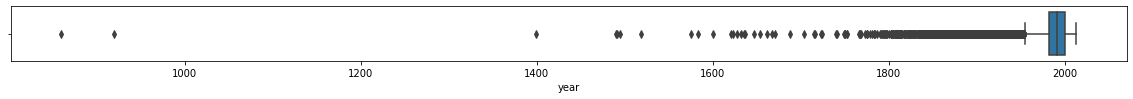

In [ ]:
#Make a boxplot for the 'year' column in the 'correct_lat_long_df' DataFrame.
import seaborn as sns

plt.figure(figsize=(20, 1))
sns.boxplot(correct_lat_long_df['year'])
plt.show()

**Missing Values**

In [ ]:
#Check whether the 'correct_lat_long_df' DataFrame has missing values or not using the 'isnull()' function.
correct_lat_long_df.isnull().sum()

name             0
id               0
nametype         0
recclass         0
mass           107
fall             0
year             0
reclat           0
reclong          0
GeoLocation      0
dtype: int64

So, there are 107 null values in the mass column.

In [ ]:
# Create a list of the indices of the rows containing missing mass values.
row_indices = correct_lat_long_df[correct_lat_long_df['mass'].isnull() == True].index
#Replace the missing values in the 'mass' column in the 'correct_lat_long_df' DataFrame with median of mass.
median_mass = correct_lat_long_df['mass'].median()
correct_lat_long_df.loc[row_indices, 'mass'] = median_mass
#Rechecking the null values
correct_lat_long_df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


name           0
id             0
nametype       0
recclass       0
mass           0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

**Cartograms**

In [ ]:
import folium
# Create a DataFrame called 'found_valid_df' and store data only for those meteorites which were actually found.
found_valid_df = correct_lat_long_df[(correct_lat_long_df['fall'] == 'Found') & (correct_lat_long_df['nametype'] == 'Valid')]

#Convert the 'year' values into integer type values.
correct_lat_long_df['year'] = correct_lat_long_df['year'].astype('int')

map = folium.Map(location=[0, 0], width='90%', height='90%', tiles='Stamen Toner', zoom_start=1.5)

for i in found_valid_df[(found_valid_df['year'] > 2004) & (found_valid_df['year'] <= 2007)].index:
  folium.Marker(location=[found_valid_df.loc[i, 'reclat'], found_valid_df.loc[i, 'reclong']],
                popup=found_valid_df.loc[i, 'name'] + '\n' + str(found_valid_df.loc[i, 'mass'] / 1000) + ' kg').add_to(map)
                # The '\n' character adds a new line. Also, we have converted the mass into kg from grams by dividing the mass by 1000.
map

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Annotated count plots**

In [ ]:
#Annotated bars in the count plot for the meteorites fallen between the years 1970 and 2000 (including both).
plt.figure(figsize=(21, 7))
cp = sns.countplot(x='year', data=correct_lat_long_df[(correct_lat_long_df['year'] >= 1970) & (correct_lat_long_df['year'] < 2001)])
for p in cp.patches:
  cp.annotate(str(p.get_height()), xy=(p.get_x() + p.get_width() / 2, p.get_height()),
              ha='center', va='bottom')

**Annotated Histograms**

In [ ]:
#Annotate the histogram stored in the 'hgram' variable.
plt.figure(figsize=(10, 5))
plt.hist(correct_lat_long_df.loc[(correct_lat_long_df['year'] >= 1970) & ((correct_lat_long_df['year'] <= 2000)), 'year'], bins=6)
for item in hgram[2]:
  plt.annotate(str(item.get_height()), xy=(item.get_x() + item.get_width() / 2, item.get_height()), ha='center', va='bottom')

plt.grid()
plt.show()